
# Beispiel Notebook basierend auf Julia




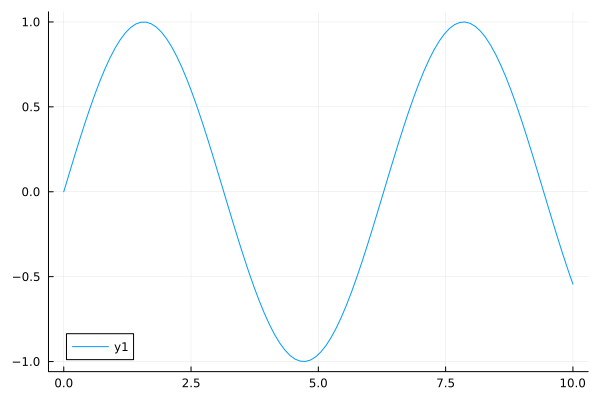

In [2]:
using Plots
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)

# ToDo: Climate Tools Example
- https://juliaclimate.org/
- https://github.com/JuliaClimate/Notebooks/tree/master

In [2]:
TableOfContents()

# ╔═╡ 6e56775b-c730-4739-9964-0056b5d8260a
md"""## Reading From File

The three commands in the code cells below accomplish this sequence :

1. open file using `NCDatasets.Dataset`; return lazy view of the file content (`ds`)
1. access one variable from the data set file; return a lazy view (`v`)
1. retrieve the data by indexing / slicing the data; return an Array (`A`)
"""

# ╔═╡ 213c15be-2e66-430f-b522-744ed4d55094
md"""## Visualizing Content

One of the common methods to visualize an array liek `A` is a heatmap.
"""

# ╔═╡ 5afe78bb-fda0-48a0-bee6-9543d89819e8
md"""## Downloading Files

There are various ways to access files via the internet. Sometimes it is necessary to download files to access their content; sometimes it isn't. Here are a couple examples:

1. data from the WHOTS program, acessed via a thredds server
2. data from the Argo program, accessed via https or ftp

These examples are from the [OceanRobots.jl](https://github.com/gaelforget/OceanRobots.jl) which provides additional information on these data sets. 
"""

# ╔═╡ 240851bb-6b44-4ffc-a7da-4c9640c79fb1
let
	fil="http://tds0.ifremer.fr/thredds/dodsC/CORIOLIS-OCEANSITES-GDAC-OBS/long_timeseries/WHOTS/OS_WHOTS_200408-201809_D_MLTS-1H.nc"
	
	NCDataset(fil)
end

# ╔═╡ baa6b7b8-e4bf-4a54-8341-0ccce0a65e9f
let
	url="https://data-argo.ifremer.fr/dac/coriolis/6900900/6900900_prof.nc"
	fil=Downloads.download(url)
	
	NCDataset(fil)
end

# ╔═╡ d6da99a1-423a-4c85-8f43-8811c09c4595
md"""## Creating Files

Below is the code that generates the file used in this notebook.

The pattern represented as a `heatmap` earlier in this notebook is of the data found in the generated file.

This pattern comes from the [Makie.jl](https://makie.juliaplots.org/stable/) documentation, where you can learn more on visualizing data.

"""

# ╔═╡ ec6e1fad-602c-465b-b54c-eeb45f5d70fe
begin
	N = 60
	
	function xy_data(x, y)
	           r = sqrt(x^2 + y^2)
	           r == 0.0 ? 1f0 : (sin(r)/r)
	end
	
	l = range(-10, stop = 10, length = N)
	z = Float32[xy_data(x, y) for x in l, y in l]
end

# ╔═╡ e4f7d5fd-0f79-4f61-8b28-562e7c87f542
begin
	function create_file(data)
	    sz = size(data)
	
	    filename = tempname()*".nc"
	    ds = NCDataset(filename,"c") do ds
	        defDim(ds,"lon",sz[1])
	        defDim(ds,"lat",sz[2])
	        v = defVar(ds,"var",Float64,("lon","lat"))
	        v[:,:] = data
	    end
		return filename
	end

	filename=create_file(z)

	isfile(filename) ? "File created is found @ $(filename)" : "File is missing !!"
end

# ╔═╡ cf5ea7f7-35be-4756-bcfa-5fad09148e69
ds = Dataset(filename)

# ╔═╡ a8f1eae9-3c9f-4f0e-8b10-726127b7933f
v=ds["var"]

# ╔═╡ ce1f0e37-2d41-4648-9bcd-2d21079fac39
A=v[:,:,1,1]

# ╔═╡ dd4c4491-203f-421f-8617-93f525fe377d
heatmap(A)

# ╔═╡ a8524123-f78c-4c6d-b455-872c3fcf7f7f
md"""## Software Links 

The [OceanStateEstimation.jl](https://gaelforget.github.io/OceanStateEstimation.jl/dev/), [OceanRobots.jl](https://gaelforget.github.io/OceanRobots.jl/dev), and [ClimateModels.jl](https://gaelforget.github.io/ClimateModels.jl/dev/) package documentations provide complementary examples that cover not only [NetCDF](https://www.unidata.ucar.edu/software/netcdf/) but also formats like `CSV` and `Zarr`. 

One option to try out these notebooks online is provided in the [JuliaClimate notebooks](https://juliaclimate.github.io/Notebooks/#page-top) page ([here](https://juliaclimate.github.io/Notebooks/#more)).

In relation to this tutorial, useful software on NetCDF and Visualization may include:

- NetCDF in Julia
  - <https://github.com/Alexander-Barth/NCDatasets.jl>
  - <https://github.com/JuliaGeo/NetCDF.jl>
  - <https://github.com/JuliaClimate>
- Visualization 
  - <https://makie.juliaplots.org/stable/>
  - <https://github.com/JuliaPlots/>
- Other NetCDF interfaces, beyond Julia
  - <https://www.giss.nasa.gov/tools/panoply/>
  - <https://xarray.pydata.org/en/stable/index.html>
"""



syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>503 Service Unavailable</title></head><body><h1>Service Unavailable</h1><p>The server is temporarily unable to service yourrequest due to maintenance downtime or capacityproblems. Please try again later.</p></body></html>


LoadError: NetCDF error: [31mOpening path http://tds0.ifremer.fr/thredds/dodsC/CORIOLIS-OCEANSITES-GDAC-OBS/long_timeseries/WHOTS/OS_WHOTS_200408-201809_D_MLTS-1H.nc: NetCDF: DAP server error[39m (NetCDF error code: -70)